## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [11]:
# Your code here - remember to use markdown cells for comments as well!

import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from geopy.distance import geodesic

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures

In [13]:
data = pd.read_csv('../data/kc_house_data.csv')

In [14]:
data = data.dropna()

KeyError: 'zip_code'

In [15]:
def zip_code(address):
    x = address.split(' ')[-3]

    return x.split(',')[0]

In [19]:
def township(address):
    x = address.split(', ')[1]

    return x

In [ ]:
(data_kc.loc[240, 'address'])

In [ ]:
pd.

In [20]:
data['zip_code'] = data['address'].apply(lambda x: zip_code(x))

In [21]:
data = data.sort_values(by = 'zip_code')

In [22]:
data['zip_code'] = data['zip_code'].astype('int')

In [23]:
data['township'] = data['address'].apply(lambda x: township(x))

In [28]:
data_kc = data[(data['zip_code'] >= 98000) & (data['zip_code'] < 99000)]

In [29]:
data_kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,township
22782,6642200450,6/22/2021,650000.0,3,2.5,2270,10993,1.0,NO,NO,...,870,570,90,1986,0,"5727 South 296th Place, Auburn, Washington 980...",47.335310,-122.261840,98001,Auburn
22829,6181430200,7/26/2021,740000.0,4,2.5,3504,7500,2.0,NO,NO,...,0,441,380,2006,0,"3809 South 337th Street, Federal Way, Washingt...",47.299625,-122.283815,98001,Federal Way
26067,4014400085,10/20/2021,670000.0,3,3.0,1950,40555,1.0,NO,NO,...,0,0,110,1941,0,"30820 42nd Avenue South, Auburn, Washington 98...",47.325130,-122.280980,98001,Auburn
1499,3751602229,8/31/2021,395000.0,3,1.0,960,7200,1.0,NO,NO,...,0,0,400,1970,0,"35216 54th Avenue South, Auburn, Washington 98...",47.285610,-122.267170,98001,Auburn
7478,2817850090,12/20/2021,578400.0,4,2.5,1690,6300,2.0,NO,NO,...,0,440,280,1998,0,"37649 37th Avenue South, Auburn, Washington 98...",47.263110,-122.287565,98001,Auburn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,2254501591,3/3/2022,815000.0,2,2.0,1170,638,2.0,NO,NO,...,390,0,320,2021,0,"708 14th Avct Southeast, Puyallup, Washington ...",47.178090,-122.284965,98372,Puyallup
5130,5414100060,1/5/2022,679950.0,2,2.0,1190,727,3.0,NO,NO,...,0,0,290,2022,0,"32nd Avenue East, Spanaway, Washington 98387, ...",47.000860,-122.386990,98387,Spanaway
19056,1021039039,5/2/2022,312750.0,3,2.0,2480,6615,2.0,NO,NO,...,620,0,600,1988,0,"2415 Birch St NE, Dash Point, Washington 98422...",47.318740,-122.416100,98422,Dash Point
29968,3319500314,7/2/2021,599950.0,2,2.5,960,1002,3.0,NO,NO,...,0,0,210,2020,0,"2023 G Street, Vancouver, Washington 98663, Un...",45.636813,-122.664928,98663,Vancouver


In [31]:
kc_zips =[98001,
98002,
98003,
98004,
98005,
98006,
98007,
98008,
98009,
98010,
98011,
98013,
98014,
98015,
98019,
98022,
98023,
98024,
98025,
98027,
98028,
98029,
98030,
98031,
98032,
98033,
98034,
98035,
98038,
98039,
98040,
98041,
98042,
98045,
98047,
98050,
98051,
98052,
98053,
98054,
98055,
98056,
98057,
98058,
98059,
98062,
98063,
98064,
98065,
98070,
98071,
98072,
98073,
98074,
98075,
98077,
98083,
98089,
98092,
98093,
98101,
98102,
98103,
98104,
98105,
98106,
98107,
98108,
98109,
98111,
98112,
98113,
98114,
98115,
98116,
98117,
98118,
98119,
98121,
98122,
98124,
98125,
98126,
98127,
98129,
98131,
98132,
98133,
98134,
98136,
98138,
98139,
98141,
98144,
98145,
98146,
98148,
98151,
98154,
98155,
98158,
98160,
98161,
98164,
98165,
98166,
98168,
98170,
98171,
98174,
98175,
98177,
98178,
98181,
98184,
98185,
98188,
98190,
98191,
98194,
98195,
98198,
98199,
98224,
98288]

In [32]:
kc_zips

[98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98009,
 98010,
 98011,
 98013,
 98014,
 98015,
 98019,
 98022,
 98023,
 98024,
 98025,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98035,
 98038,
 98039,
 98040,
 98041,
 98042,
 98045,
 98047,
 98050,
 98051,
 98052,
 98053,
 98054,
 98055,
 98056,
 98057,
 98058,
 98059,
 98062,
 98063,
 98064,
 98065,
 98070,
 98071,
 98072,
 98073,
 98074,
 98075,
 98077,
 98083,
 98089,
 98092,
 98093,
 98101,
 98102,
 98103,
 98104,
 98105,
 98106,
 98107,
 98108,
 98109,
 98111,
 98112,
 98113,
 98114,
 98115,
 98116,
 98117,
 98118,
 98119,
 98121,
 98122,
 98124,
 98125,
 98126,
 98127,
 98129,
 98131,
 98132,
 98133,
 98134,
 98136,
 98138,
 98139,
 98141,
 98144,
 98145,
 98146,
 98148,
 98151,
 98154,
 98155,
 98158,
 98160,
 98161,
 98164,
 98165,
 98166,
 98168,
 98170,
 98171,
 98174,
 98175,
 98177,
 98178,
 98181,
 98184,
 98185,
 98188,
 98190,
 98191,
 98194,
 98195,
 98198,
 98199,
 98224,
 98288]

In [25]:
data_kc['township'].nunique()

65

In [27]:
data_kc['township']

22782         Auburn
22829    Federal Way
26067         Auburn
1499          Auburn
7478          Auburn
            ...     
17421       Puyallup
5130        Spanaway
19056     Dash Point
29968      Vancouver
12763      Vancouver
Name: township, Length: 29200, dtype: object

In [44]:
data_kc = data[data['zip_code'].isin(kc_zips)]

In [46]:
data_kc['zip_code'].nunique()

76

In [47]:
len(kc_zips)

125

In [ ]:
data_kc['zip_code'].nunique()

In [48]:
data_kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,township
22782,6642200450,6/22/2021,650000.0,3,2.5,2270,10993,1.0,NO,NO,...,870,570,90,1986,0,"5727 South 296th Place, Auburn, Washington 980...",47.335310,-122.261840,98001,Auburn
22829,6181430200,7/26/2021,740000.0,4,2.5,3504,7500,2.0,NO,NO,...,0,441,380,2006,0,"3809 South 337th Street, Federal Way, Washingt...",47.299625,-122.283815,98001,Federal Way
26067,4014400085,10/20/2021,670000.0,3,3.0,1950,40555,1.0,NO,NO,...,0,0,110,1941,0,"30820 42nd Avenue South, Auburn, Washington 98...",47.325130,-122.280980,98001,Auburn
1499,3751602229,8/31/2021,395000.0,3,1.0,960,7200,1.0,NO,NO,...,0,0,400,1970,0,"35216 54th Avenue South, Auburn, Washington 98...",47.285610,-122.267170,98001,Auburn
7478,2817850090,12/20/2021,578400.0,4,2.5,1690,6300,2.0,NO,NO,...,0,440,280,1998,0,"37649 37th Avenue South, Auburn, Washington 98...",47.263110,-122.287565,98001,Auburn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,2608600080,8/6/2021,619000.0,4,1.0,1350,21640,1.5,YES,NO,...,0,0,280,1964,0,"10055 Foss River Place Northeast, Skykomish, W...",47.694940,-121.298765,98288,Skykomish
4748,774100475,10/5/2021,950000.0,3,2.0,2600,64626,1.5,NO,NO,...,0,0,360,2009,0,"69506 Northeast Money Creek Road, Skykomish, W...",47.718260,-121.405660,98288,Skykomish
4638,2626119082,9/24/2021,450000.0,1,1.0,880,8087,1.0,YES,NO,...,0,0,0,1908,1996,"524 East Railroad Avenue, Skykomish, Washingto...",47.710030,-121.354260,98288,Skykomish
9757,5061800021,11/8/2021,275000.0,3,1.0,930,7804,1.5,NO,NO,...,740,0,0,1910,0,"137 Dean Avenue, Skykomish, Washington 98288, ...",47.708140,-121.363070,98288,Skykomish


In [49]:
def geo_distance(coord_a, coord_b):
    #take two coordinates and calculate distances in miles
    
    return geodesic(coord_a, coord_b).miles

In [50]:
amazing_coord = (47.615722, -122.339494)

In [51]:
data_kc['location'] = list(zip(data_kc.lat, data_kc.long))

In [54]:
data_kc['distance_to_amazon'] = data_kc['location'].apply(lambda x: geodesic(x, amazing_coord).miles)

In [101]:
data_near_amzn = data_kc[data_kc['distance_to_amazon'] <= 3]

In [116]:
data_near_amzn_filt = data_near_amzn[data_near_amzn['price'] < 10000000]

In [117]:
data_near_amzn_filt

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,township,location,distance_to_amazon
3731,2207500170,10/26/2021,1200000.0,5,2.5,3420,4000,2.0,NO,NO,...,0,1910,0,"2203 11th Avenue East, Seattle, Washington 981...",47.638530,-122.318290,98102,Seattle,"(47.63853, -122.31829)",1.861062
13473,2663000490,9/3/2021,989000.0,2,2.0,1250,745,2.0,NO,NO,...,500,2017,0,"711 Federal Ave E, Seattle, Washington 98102, ...",47.625710,-122.319290,98102,Seattle,"(47.62571, -122.31929)",1.169069
30105,6003501586,2/28/2022,1384375.0,4,3.0,2010,3200,1.5,NO,NO,...,70,1901,1988,"1122 East John Street, Seattle, Washington 981...",47.620125,-122.317155,98102,Seattle,"(47.620125, -122.317155)",1.086918
8179,1952200225,8/17/2021,875000.0,3,3.0,1630,6614,1.0,NO,NO,...,390,1927,0,"2418 Delmar Drive East, Seattle, Washington 98...",47.641120,-122.315260,98102,Seattle,"(47.64112, -122.31526)",2.087990
29320,2207500465,8/19/2021,738000.0,2,1.0,1120,1200,2.0,NO,NO,...,0,1900,0,"1006 East Newton Street, Seattle, Washington 9...",47.637390,-122.319620,98102,Seattle,"(47.63739, -122.31962)",1.761365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25649,269000615,7/8/2021,1540000.0,3,2.0,2440,6641,1.0,NO,NO,...,250,1947,0,"2559 24th Avenue West, Seattle, Washington 981...",47.642605,-122.388000,98199,Seattle,"(47.642605, -122.388)",2.929318
28742,2770602220,9/13/2021,800000.0,2,1.0,1900,6000,1.0,NO,NO,...,0,1949,0,"2807 21st Avenue West, Seattle, Washington 981...",47.645050,-122.383620,98199,Seattle,"(47.64505, -122.38362)",2.889943
25742,2771604005,12/3/2021,1305000.0,3,3.0,2390,6000,1.0,NO,NO,...,500,1941,0,"2623 West Crockett Street, Seattle, Washington...",47.637475,-122.391435,98199,Seattle,"(47.637475, -122.39143500000002)",2.853623
25393,2770600840,7/7/2021,801000.0,4,2.0,1560,2896,1.0,NO,NO,...,0,1952,0,"2646 23rd Avenue West, Seattle, Washington 981...",47.644335,-122.385691,98199,Seattle,"(47.644335, -122.385691)",2.926101


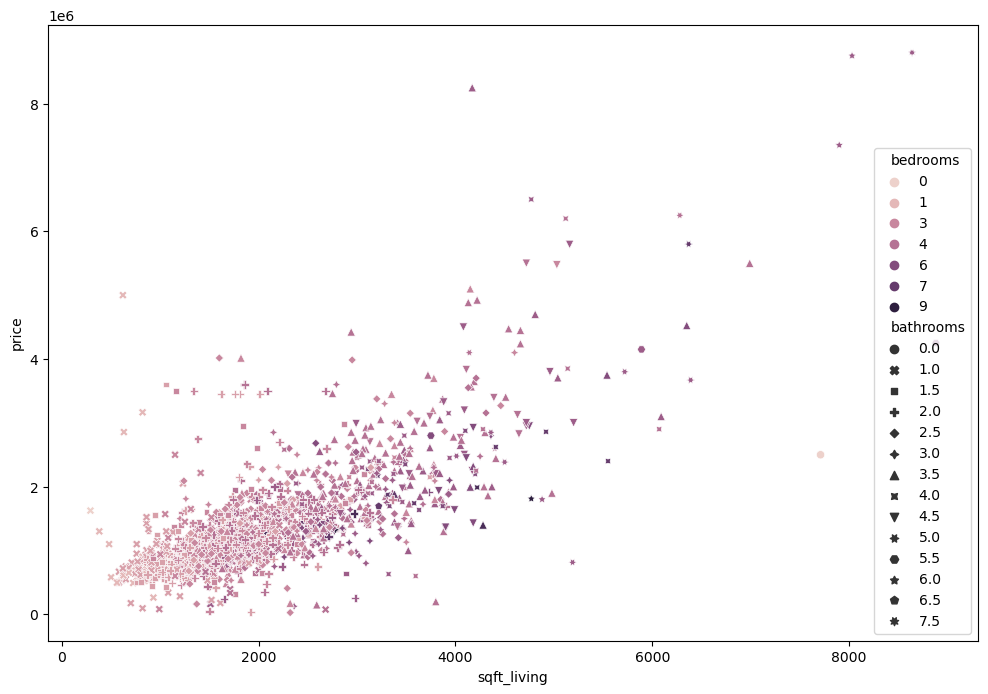

In [124]:
fig, ax = plt.subplots(figsize = (12,8))

x = data_near_amzn_filt['sqft_living']
y = data_near_amzn_filt['price']
hue = data_near_amzn_filt['bedrooms']
size = data_near_amzn_filt['bathrooms']


sns.scatterplot(x = x, y = y, hue = hue, ax=ax, style = size);



In [ ]:
data_kc.columns

In [ ]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(data_kc[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'yr_built',
       'yr_renovated', 'zip_code']].corr(), annot=True, linewidths=.3)


In [ ]:
X = data_kc[['sqft_lot' ,'sqft_living', 'floors']]
y = data_kc['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X_train)


In [ ]:
X_standardized_train = ss.transform(X_train)

In [ ]:
X_standardized_test = ss.transform(X_test)

In [ ]:
lr_raw = LinearRegression()
lr_raw.fit(X_standardized_train, y_train)

lr_raw.score(X_standardized_train, y_train)

In [ ]:
lr_raw.score(X_standardized_test, y_test)

In [ ]:
pd.Series(lr_raw.coef_,
          index = X.columns) 

In [ ]:
y_pred = lr_raw.predict(X_standardized_test)
mean_absolute_error(y_pred, y_test)

In [ ]:
sns.pairplot(data[['price', 'sqft_lot', 'yr_built', 'sqft_living']])

In [ ]:
sorted(data_kc['grade'].unique())

In [ ]:
data_kc.columns

In [ ]:
grade_list = ['2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [ ]:
new_kcdf = pd.concat([closekcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

In [ ]:
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(closekcdf[['grade', 'condition', 'view']]), columns = closekcdf[['grade', 'condition', 'view']].columns)

In [ ]:
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [ ]:
nominal_cols = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system','zip_code']

In [ ]:
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

In [ ]:
nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names())

In [ ]:
cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code']), nominal_df],1)

In [ ]:
data_focused['condition'].value_counts()

In [ ]:
data_focused['condition'] = data_focused['condition'].astype('category')

In [ ]:
data_focused['condition']

In [ ]:
data_focused.columns

In [ ]:
#data_focused['grade_num'] = data_focused['grade_num'].as_numeric

In [ ]:
heatmap_data = data_focused[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance',
       'condition', 'grade', 'distance_to_amazon', 'grade_num']]

In [ ]:
sns.heatmap(heatmap_data.corr(), annot = True)#, mask = heatmap_data.corr())

In [ ]:
data_focused['grade_num'] = data_focused['grade'].apply(lambda x: x.split(' ')[0])

In [ ]:
data_focused['grade_num'].value_counts()

In [ ]:
data['view'].value_counts()

In [ ]:
data_focused['grade_num'] = data_focused['grade_num'].astype('float')

In [ ]:
micro_coord = (47.63959872758785, -122.12826883333561)

amazon_coord = (47.606200, -122.332100)
amazing_coord = (47.615722, -122.339494)

In [ ]:
data_focused['location'] = list(zip(data_focused.lat, data_focused.long))

In [ ]:
data_focused['distance_to_amazon'] = data_focused['location'].apply(lambda x: geodesic(x, amazing_coord).miles)

In [ ]:
data_focused.describe()

In [ ]:
data_focused_15 = data_focused[data_focused['distance_to_amazon'] <= 15]

In [ ]:
data_focused_10 = data_focused[data_focused['distance_to_amazon'] <= 10]

In [ ]:
data

In [ ]:
data_focused_10['zip_code'] = data_focused_10['address'].apply(lambda x: zip_code(x))


In [ ]:
data_focused_10['zip_code'].nunique()

In [ ]:
data_focused_10['zip_category'] = data_focused_10['zip_code'].astype('int')

In [ ]:
sns.pairplot(data_focused_10[['price','zip_category', 'bedrooms', 'bathrooms']])

In [ ]:
def geo_distance(coord_a, coord_b):
    #take two coordinates and calculate distances in miles
    
    return geodesic(coord_a, coord_b).miles

In [ ]:
geodesic(micro_coord, (47.461975, -122.19052)).miles

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures


In [ ]:
sorted(data_focused['grade_num'].unique())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_focused['grade_num'], data_focused['price'], test_size = 0.3)

lr_simple = LinearRegression()


In [ ]:
lr_simple.fit(X_train.values.reshape(-1,1), y_train)

In [ ]:
print(lr_simple.coef_, lr_simple.intercept_)

In [ ]:
lr_simple.score(X_train.values.reshape(-1,1),
                y_train)

In [ ]:
y_pred = lr_simple.predict(X_test.values.reshape(-1,1))
mean_absolute_error(y_pred, y_test)

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

In [10]:
data_kc

NameError: name 'data_kc' is not defined